In [0]:
from fastai import *
from fastai.vision import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [0]:
# from google.colab import files

# uploaded = files.upload()

# Create folders

In [0]:
folder = 'goodmorn'
file = 'gm.txt'

In [0]:
folder = 'random'
file = 'random.txt'

In [0]:
path = Path('data/images')
dest = path/folder
dest.mkdir(parents = True, exist_ok = True)

# Download images

In [0]:
classes = ['goodmorn', 'random']

In [0]:
download_images(path/folder/file, dest, max_pics = 500)

# Clean up a bit

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

# View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train = ".", valid_pct = 0.2, ds_tfms = get_transforms(), size = 224, num_workers = 4).normalize(imagenet_stats)

In [17]:
data.classes

['goodmorn', 'random']

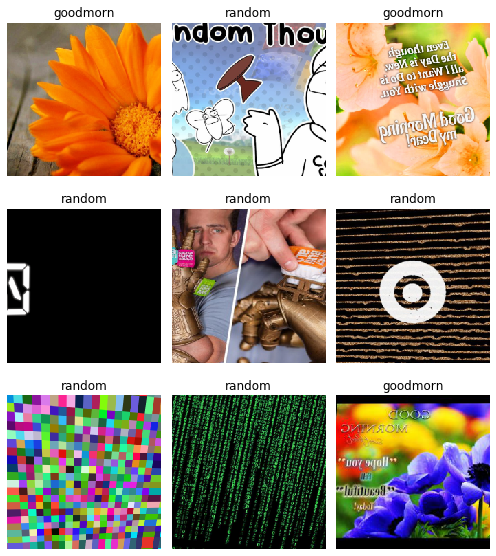

In [18]:
data.show_batch(rows = 3, figsize = (7,8))

In [19]:
data.classes, data.c , len(data.train_ds), len(data.valid_ds)

(['goodmorn', 'random'], 2, 715, 178)

# Model

In [20]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 84.5MB/s]


In [21]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.071766,1.062979,0.292135,00:35
1,0.654680,0.294243,0.101124,00:33
2,0.495181,0.235260,0.084270,00:33
3,0.372108,0.237210,0.078652,00:34
4,0.304775,0.228265,0.078652,00:33
5,0.243479,0.223746,0.084270,00:33


In [22]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.117573,0.226777,0.084270,00:33


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


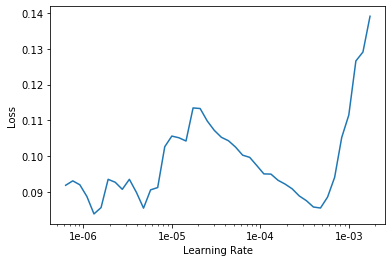

In [26]:
learn.recorder.plot()

# CHoose rates

In [27]:
learn.fit_one_cycle(2, max_lr = slice(3e-5,2e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.121284,0.226885,0.078652,00:34
1,0.081758,0.220560,0.073034,00:35


In [0]:
learn.save('stage-2')

# Performance

In [29]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (715 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
random,random,random,random,random
Path: data/images;

Valid: LabelList (178 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
goodmorn,random,goodmorn,goodmorn,random
Path: data/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

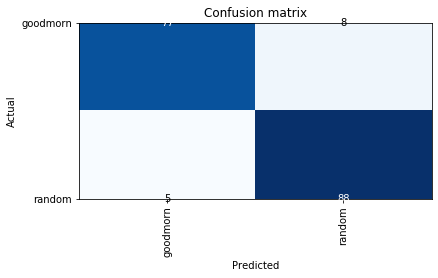

In [31]:
interp.plot_confusion_matrix()

# Predict for new image

In [0]:
classes = ['goodmorn','random']

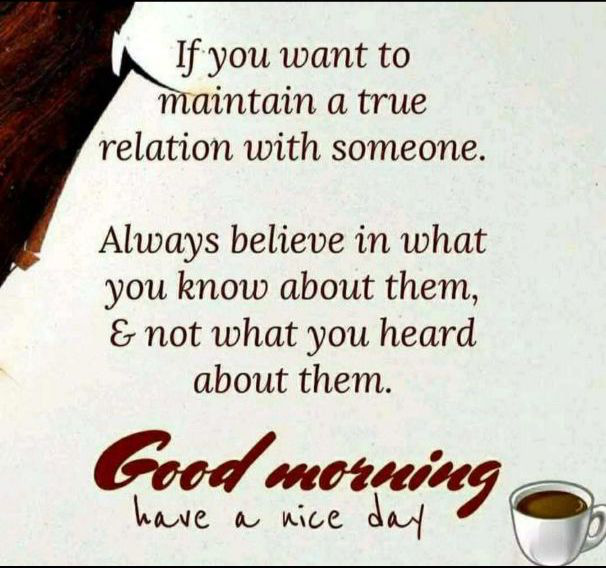

In [33]:
img = open_image(path/'goodmorn'/'morning.jpg');img

In [34]:
data2 = ImageDataBunch.single_from_classes(path, classes, ds_tfms = get_transforms(), size = 224).normalize(imagenet_stats)
learn = cnn_learner(data2, models.resnet34)
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/images;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): 

In [35]:
pred_class, pred_idx, outputs = learn.predict(img); pred_class

Category goodmorn